In [1]:
from sklearn.datasets import make_classification

X,y=make_classification(n_samples=16, n_features=2,n_informative=2, n_redundant=0, random_state=10)


In [2]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression().fit(X,y)
y_hat= model.predict(X)
f_value=model.decision_function(X)

In [3]:
import numpy as np
import pandas as pd

df=pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat","y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [4]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y,y_hat, labels=[0,1])

array([[7, 1],
       [1, 7]], dtype=int64)

In [5]:
tpr0=7/(7+1)
fpr0=1/(1+7)
print(tpr0)
print(fpr0)

0.875
0.125


In [6]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds=roc_curve(y, model.decision_function(X))
fpr,tpr,thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [8]:
fpr,tpr, thresholds=roc_curve(y, model.predict_proba(X)[:,1])
fpr,tpr,thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

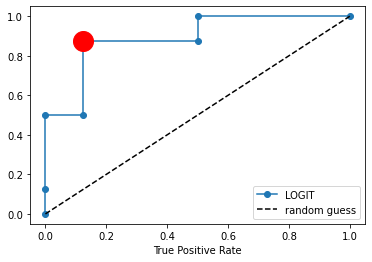

In [9]:
import matplotlib.pyplot as plt

plt.plot(fpr,tpr,'o-',label="LOGIT")
plt.plot([0,1],[0,1],'k--',label="random guess")
plt.plot([fpr0],[tpr0],'ro',ms=20)
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.legend()
plt.show()